# Covid-19 data
We load in the dataset of covid-19 stats from all countries in the world by week from this site, which has data by country for many topics, not just covid-19
* [Our World in Data](https://ourworldindata.org/)

and the covid-19 data is available from this github site:
* [owid](https://github.com/owid/covid-19-data/tree/master/public/data/)

This notebook gives another example of using pandas to quickly get information from a large dataset,
in this case a dataset with 67 columns and 164,709 rows of data about covid-19 over time in all countries of the world.


In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


# Read the latest version of data from the URL
We first have to import the SSL library to allow us to read https files. 
This is somewhat dangerous as it is not checking that the URL has a verified SSL, but for github that is not an issue.



In [17]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

The code below loads the latest data directly from the URL.

We could also download the data to a file and create the pandas data frame from the file. 

We have the data from 2/28/2022 in the file
```
data/owid-covid-data.csv
```
if you would rather use that, just uncomment the two lines below and comment out the first two line.

In [18]:
covid_url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(covid_url)

#covid_file = 'data/owid-covid-data.csv'
#df = pd.read_csv(covid_file)

df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166321,ZWE,Africa,Zimbabwe,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166322,ZWE,Africa,Zimbabwe,2022-03-02,237503.0,632.0,416.286,5396.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166323,ZWE,Africa,Zimbabwe,2022-03-03,237503.0,0.0,362.286,5396.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166324,ZWE,Africa,Zimbabwe,2022-03-04,238739.0,1236.0,467.429,5397.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


# Look at all of the columns

In [19]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [97]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.628370e+05,1.627000e+05,1.607210e+05,1.450130e+05,145058.000000,142968.000000,162081.000000,161944.000000,159971.000000,144270.000000,...,105758.000000,104307.000000,68379.000000,123324.000000,154838.000000,135875.000000,5.696000e+03,5696.000000,5696.000000,5696.000000
mean,2.519948e+06,1.152028e+04,1.151595e+04,5.749360e+04,171.232686,172.756426,29197.452024,165.574605,164.660595,507.535387,...,10.627388,32.777934,50.790149,3.027889,73.576553,0.725595,3.761302e+04,9.404336,15.967077,972.197816
std,1.531862e+07,8.419134e+04,8.234606e+04,3.012479e+05,832.733135,817.449855,51253.101278,680.789866,529.498253,782.321880,...,10.558520,13.523426,31.812027,2.450185,7.491729,0.149966,1.043065e+05,16.439173,30.092830,1420.342295
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,1.986000e+03,1.000000e+00,7.000000e+00,7.900000e+01,0.000000,0.143000,620.689000,0.042000,1.630000,18.455250,...,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-7.515000e+01,-0.722500,-0.752500,-29.788442
50%,2.598100e+04,7.900000e+01,1.070000e+02,7.800000e+02,2.000000,2.571000,4702.754000,11.431000,18.783000,127.035500,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,3.424600e+03,6.065000,7.195000,473.393182
75%,2.968170e+05,1.062000e+03,1.142857e+03,7.286000e+03,20.000000,21.286000,37514.087000,101.215000,120.544000,708.502000,...,19.300000,41.300000,83.241000,4.000000,78.930000,0.845000,2.478462e+04,14.520000,22.997500,1656.361067
max,4.420675e+08,4.206334e+06,3.444237e+06,5.981034e+06,18020.000000,14689.143000,706541.904000,51427.491000,16052.608000,6317.377000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.080748e+06,111.010000,374.930000,9153.060433


In [131]:
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

# Calculate the total deaths for all countries and regions
We can use the groupby method to determine sum up the deaths in all countries so far


In [98]:
z = df.groupby('location')
z.groups['United States']

Int64Index([156792, 156793, 156794, 156795, 156796, 156797, 156798, 156799,
            156800, 156801,
            ...
            157554, 157555, 157556, 157557, 157558, 157559, 157560, 157561,
            157562, 157563],
           dtype='int64', length=772)

In [99]:
#z.['new_deaths'].agg(sum).sort_values(ascending=False)
#z.head(20)

# plot one column for one country
Here is a direct way to plot the people_vaccinated_per_hundred data for the USA,
but this isn't the best way as it uses the original indices instead of the date.

In [133]:
df2 = df[df['location']=='World']  # select out just those rows with iso_code = USA
df2.index = df2['date']
df2

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,OWID_WRL,NaN,World,2020-01-22,557.0,0.0,NaN,17.0,0.0,NaN,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
2020-01-23,OWID_WRL,NaN,World,2020-01-23,657.0,100.0,NaN,18.0,1.0,NaN,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
2020-01-24,OWID_WRL,NaN,World,2020-01-24,944.0,287.0,NaN,26.0,8.0,NaN,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
2020-01-25,OWID_WRL,NaN,World,2020-01-25,1437.0,493.0,NaN,42.0,16.0,NaN,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
2020-01-26,OWID_WRL,NaN,World,2020-01-26,2120.0,683.0,NaN,56.0,14.0,NaN,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-27,OWID_WRL,NaN,World,2022-02-27,435588284.0,1065246.0,1563460.000,5949086.0,4417.0,8453.571,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
2022-02-28,OWID_WRL,NaN,World,2022-02-28,436991765.0,1403481.0,1555737.000,5956845.0,7759.0,8499.857,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
2022-03-01,OWID_WRL,NaN,World,2022-03-01,438528632.0,1536867.0,1517307.571,5964706.0,8069.0,8308.286,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN


In [134]:
df2['new_deaths']

date
2020-01-22       0.0
2020-01-23       1.0
2020-01-24       8.0
2020-01-25      16.0
2020-01-26      14.0
               ...  
2022-02-27    4417.0
2022-02-28    7759.0
2022-03-01    8069.0
2022-03-02    7945.0
2022-03-03    8384.0
Name: new_deaths, Length: 772, dtype: float64

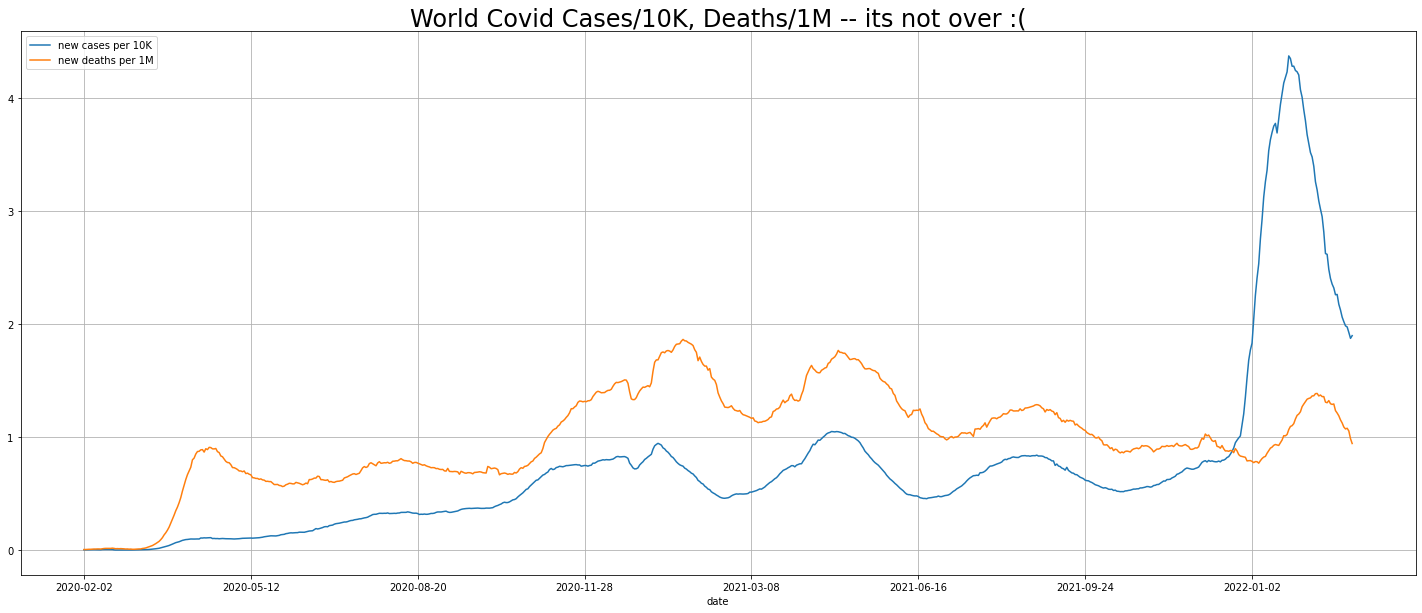

In [152]:
plt.figure(figsize=(25,10))
cutoff = '2020-02-01'
#df2[df2['date']>cutoff]['new_cases'].plot()
(df2[df2['date']>cutoff]['new_cases_smoothed_per_million']/100).plot()
(df2[df2['date']>cutoff]['new_deaths_smoothed_per_million']).plot()
plt.grid()
plt.legend(['new cases per 10K','new deaths per 1M'])
plt.title("World Covid Cases/10K, Deaths/1M -- its not over :(",fontsize=24)
plt.savefig('images/world_covid.png')

# print the unique locations

In [103]:
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

# Create a pivot table
index is the date, and columns are the values in the location column
the value is the people_vaccinated_per_hundred.
We can then plot just the columns we want!

In [104]:
column = 'new_deaths_smoothed_per_million'

df2 = pd.pivot_table(df, values=column, index=["date"], columns=["location"])
df2




location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN
2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN
2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.004,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-27,0.194,0.164,1.293,0.109,1.847,0.000,0.0,0.0,2.638,6.113,...,4.017,0.059,0.0,0.144,0.936,0.0,1.073,0.056,0.068,0.066
2022-02-28,0.176,0.152,1.193,0.096,1.847,0.004,0.0,0.0,2.196,5.920,...,3.689,0.059,0.0,0.134,1.334,0.0,1.079,0.056,0.053,0.085
2022-03-01,0.143,0.141,1.044,0.090,0.000,0.004,0.0,0.0,2.002,5.968,...,3.525,0.055,0.0,0.100,NaN,0.0,1.055,0.052,0.053,0.066


# Plot the columns we want!

In [105]:
df2[['United States','Ukraine','Russia']]

location,United States,Ukraine,Russia
date,,,
2020-01-28,NaN,NaN,NaN
2020-01-29,NaN,NaN,NaN
2020-01-30,NaN,NaN,NaN
2020-01-31,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN
...,...,...,...
2022-02-27,5.148,3.405,5.227
2022-02-28,5.678,2.951,5.224
2022-03-01,5.497,1.962,5.214


Text(0.5, 1.0, 'new_deaths_smoothed_per_million')

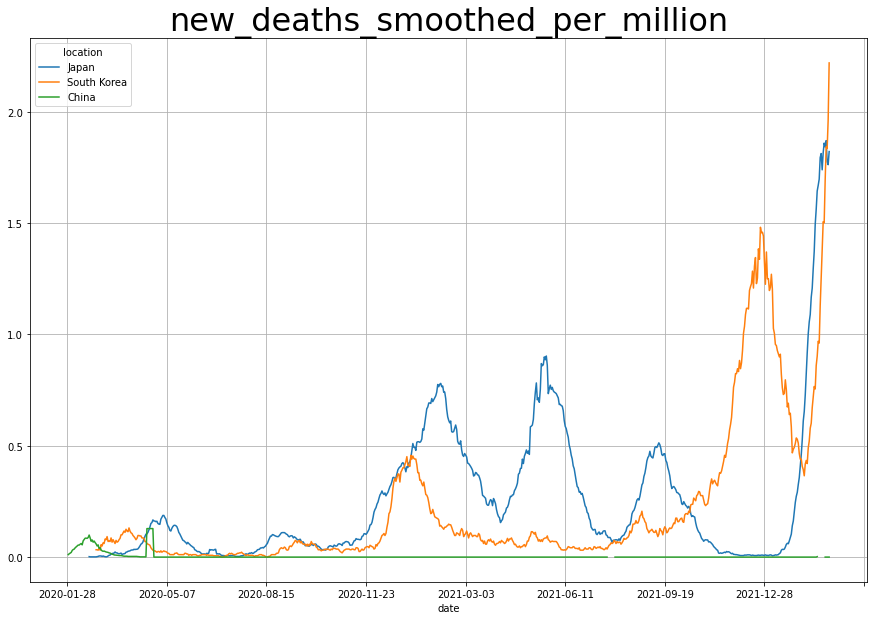

In [106]:
df2[['Japan','South Korea','China']].plot(figsize=(15,10))
plt.grid()
plt.title(column,fontsize=32)

# Plot new deaths for all countries

'done'

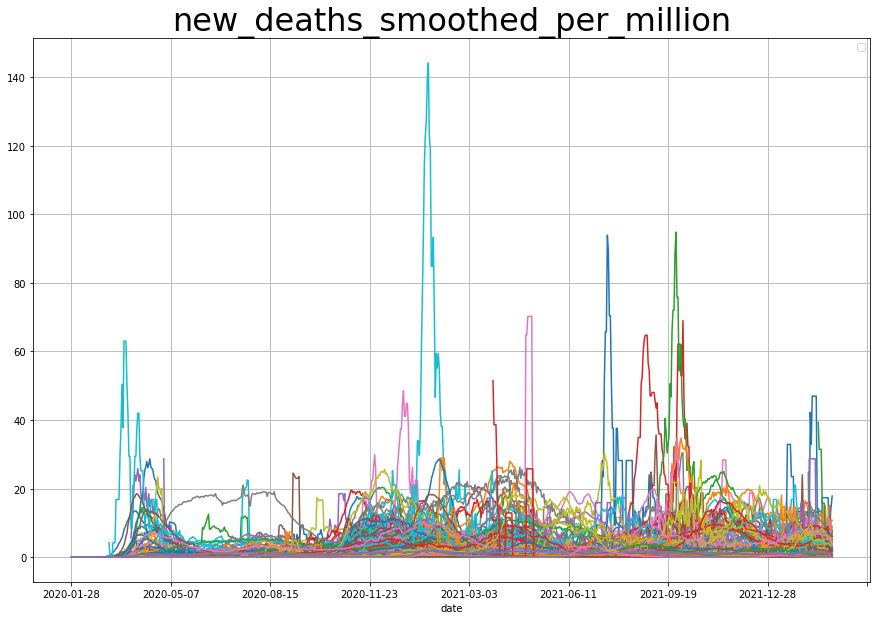

In [107]:
df2.plot(figsize=(15,10))
plt.grid()
plt.title(column,fontsize=32)
plt.legend([])
'done'

# Aggregation
Lets generate plots for the continents using aggretation!
Say, new_deaths_smoothed, aggregated over continents by date.


<Figure size 1440x1440 with 0 Axes>

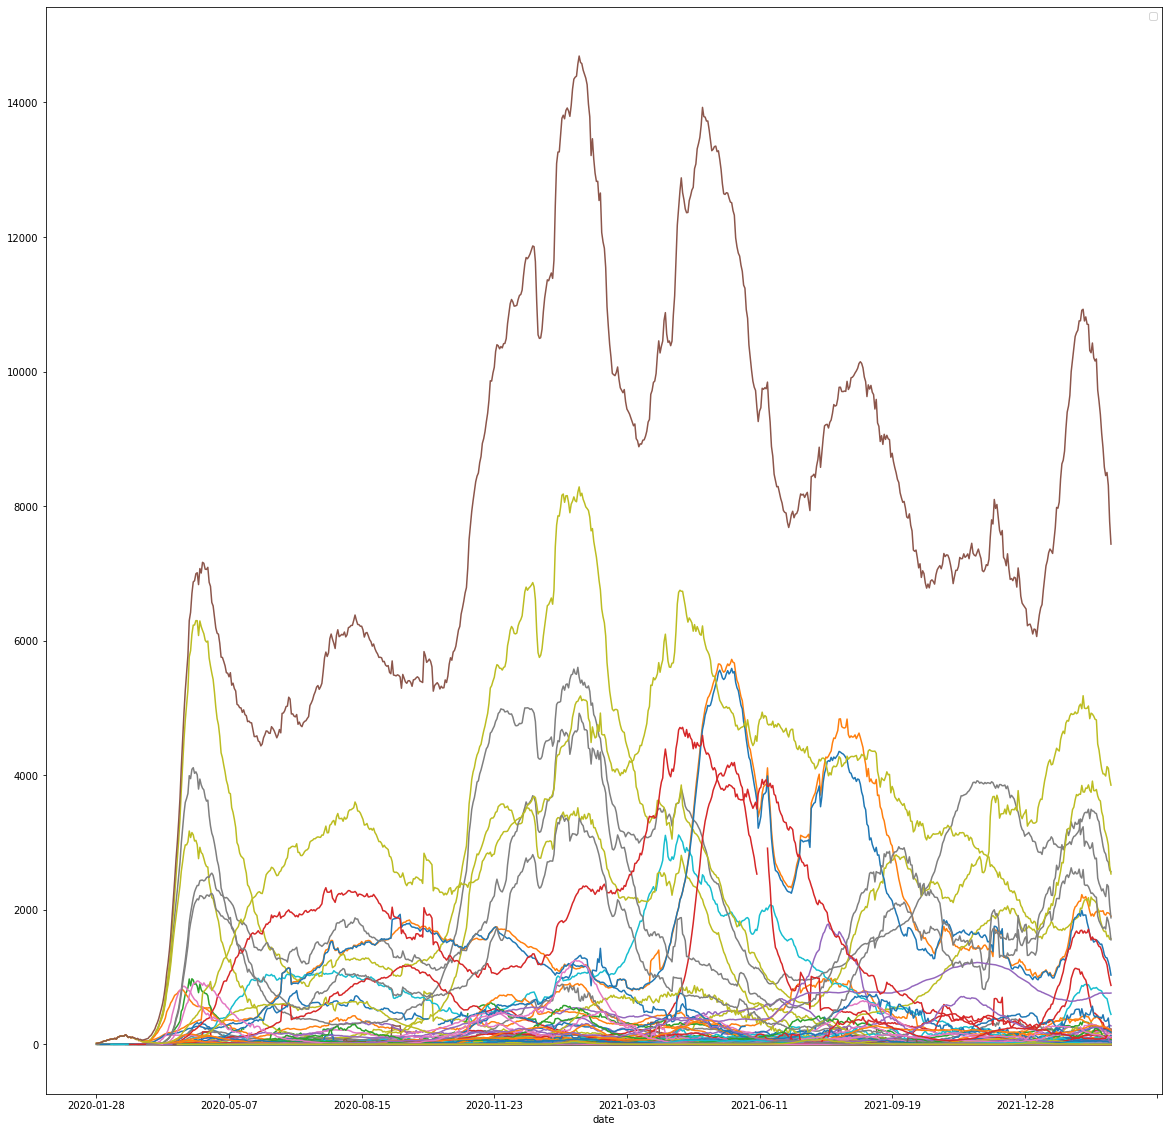

In [108]:
column = 'new_deaths_smoothed'
plt.figure(figsize=(20,20))
df3 = pd.pivot_table(df, values=column, index=["date"], columns=["location"])
df3.plot(figsize=(20,20))
plt.legend([])


# Plot the total worldwide deaths

In [109]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165865,ZWE,Africa,Zimbabwe,2022-02-27,235803.0,0.0,350.143,5393.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165866,ZWE,Africa,Zimbabwe,2022-02-28,236380.0,577.0,401.286,5395.0,2.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165867,ZWE,Africa,Zimbabwe,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165868,ZWE,Africa,Zimbabwe,2022-03-02,237503.0,632.0,416.286,5396.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [110]:
df4 = df[df['location']=='United States'].groupby(['date']).new_deaths_smoothed.agg(sum)
df4

date
2020-01-22       0.000
2020-01-23       0.000
2020-01-24       0.000
2020-01-25       0.000
2020-01-26       0.000
                ...   
2022-02-27    1713.857
2022-02-28    1890.286
2022-03-01    1830.000
2022-03-02    1725.000
2022-03-03    1553.714
Name: new_deaths_smoothed, Length: 772, dtype: float64

Text(0.5, 1.0, 'Covid deaths in the US from Jan 2020 to Feb 2022')

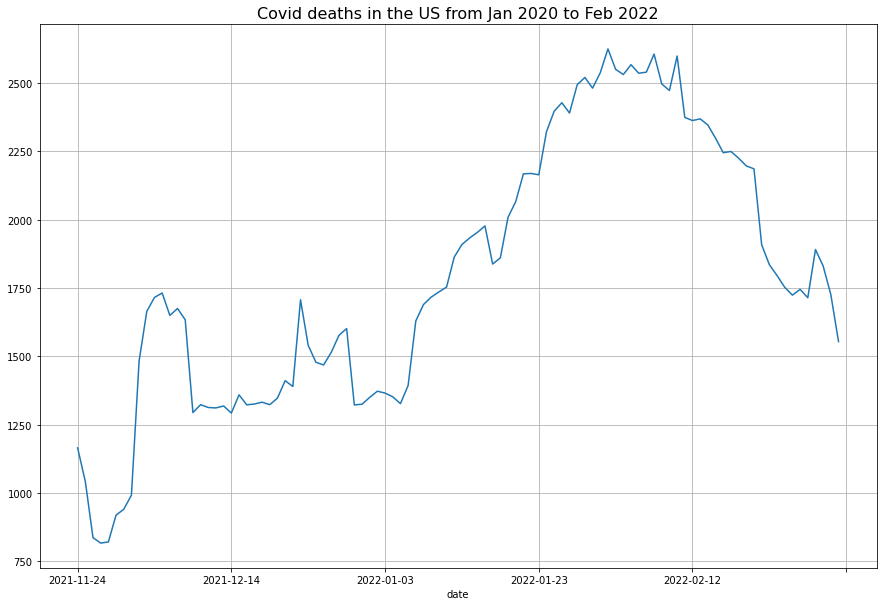

In [111]:
df4.iloc[-100:].plot(figsize=(15,10))
plt.grid()
plt.title('Covid deaths in the US from Jan 2020 to Feb 2022',fontsize=16)

# Plot the deaths on each continent

In [112]:
continents = df['continent'].unique()
continents

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

<Figure size 1440x360 with 0 Axes>

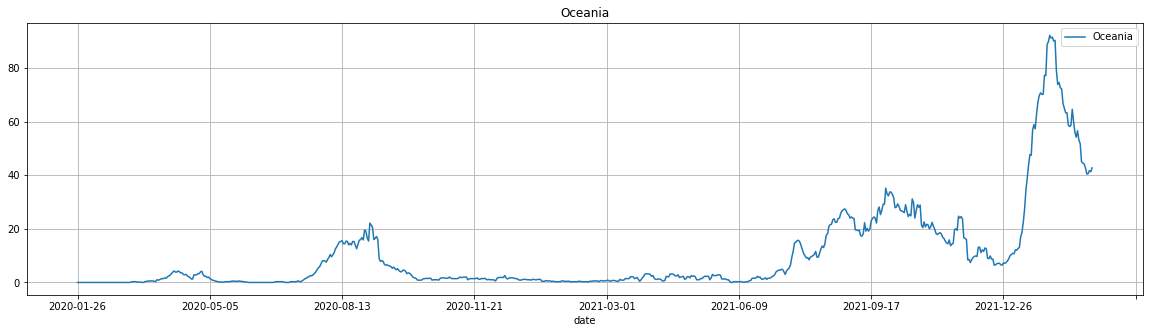

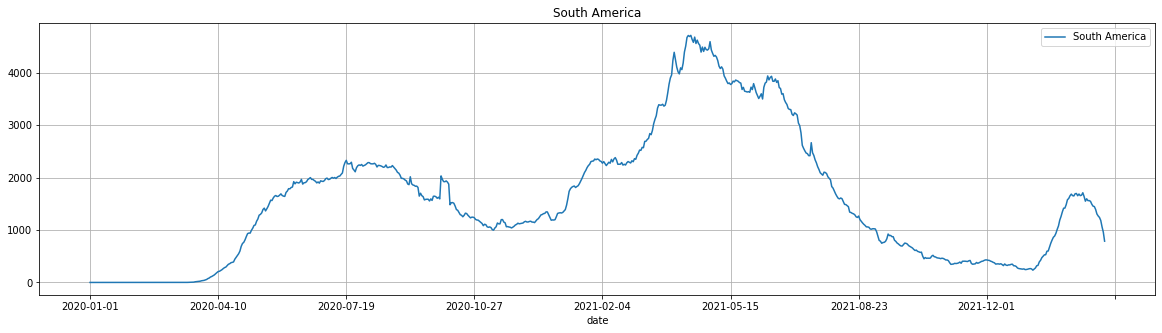

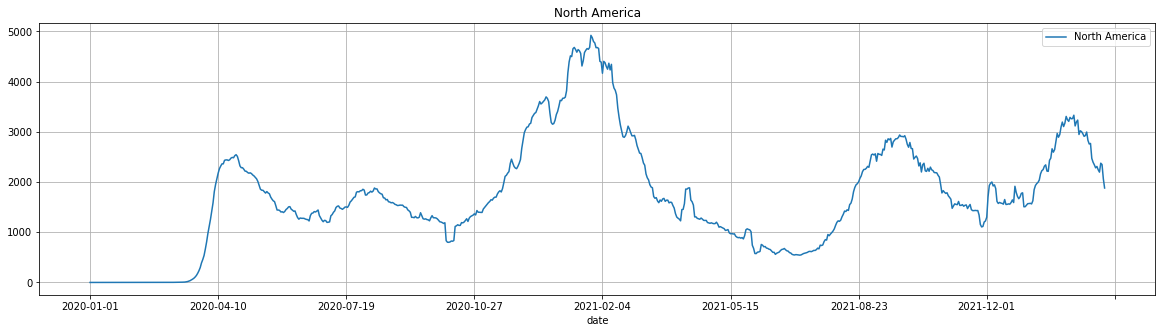

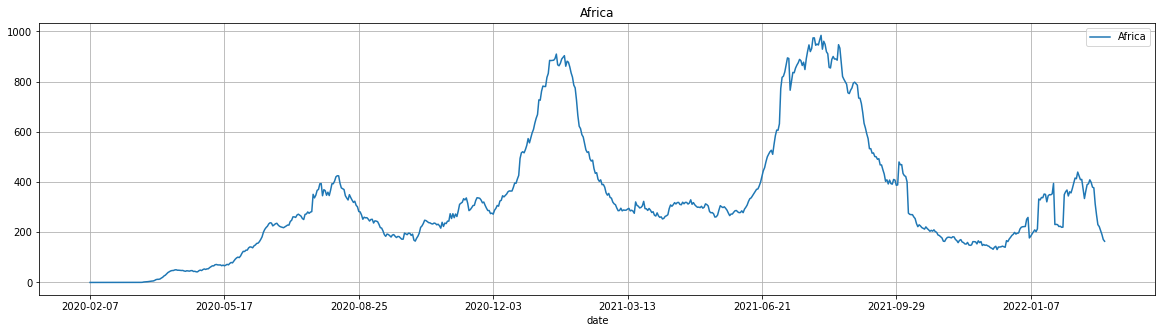

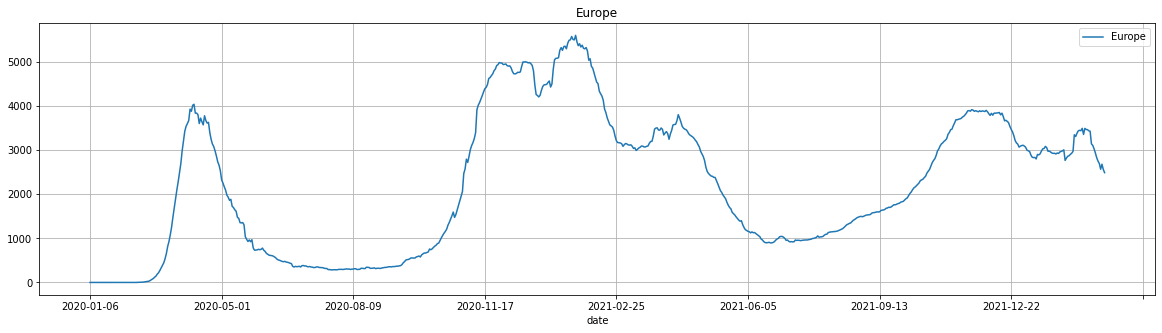

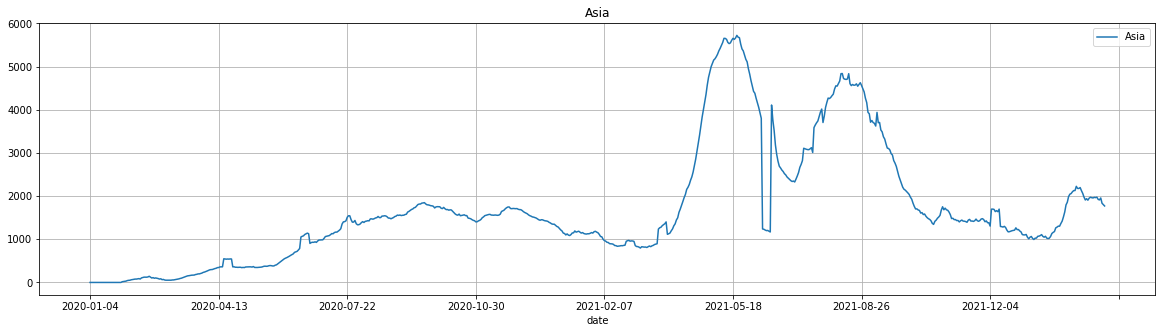

In [113]:
plt.figure(figsize=(20,5))
for continent in continents[::-1]:
    if str(continent)=='nan':  # I don't know why some fields have continent = 'nan'
           continue
    plt.figure(figsize=(20,5))
    
    # select only those rows for the continent we're interested in
    df6 = df[df['continent']==continent]
    
    # sum up all of the deaths on that continent grouped by date and get a new Series object
    new_deaths = df6.groupby(['date']).new_deaths_smoothed.agg(sum)
    
    # plot those deaths and add the label for the continent
    new_deaths.plot(label=continent)
    
    # add the title, grid, and legend
    plt.title(continent)
    plt.grid()
    plt.legend()

